In [207]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [208]:
import numpy as np
import pandas as pd

In [209]:
import datetime as dt

In [210]:
import scipy.stats as sts

# Reflect Tables into SQLAlchemy ORM

In [211]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [212]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [213]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [214]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [215]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [216]:
# Create our session (link) from Python to the DB
session = Session(engine)

#inspect column names & types
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [217]:
#view the data in a dataframe

#query the db so it can be put into a df
measurement_data = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()

#view the data in the df
measurement_df = pd.DataFrame(measurement_data, columns = ['id','station', 'date', 'prcp', 'tobs'])
measurement_df.set_index('id', inplace = True)
measurement_df = measurement_df.sort_values(by = 'date', ascending=False)
measurement_df.head()

,station,date,prcp,tobs
id,,,,
19550,USC00516128,2017-08-23,0.45,76.0
12187,USC00519523,2017-08-23,0.08,82.0
2724,USC00519397,2017-08-23,0.00,81.0
7635,USC00514830,2017-08-23,0.00,82.0
12186,USC00519523,2017-08-22,0.00,82.0


# Exploratory Climate Analysis

In [218]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the databas e

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [219]:
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdate

('2017-08-23')

In [220]:
#how many records are there?
session.query(func.count(Measurement.date)).all()

[(19550)]

In [221]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
raindata = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date > '2016-07-31').\
    order_by(Measurement.date.desc()).all()

for rain in raindata:
    print(rain.date)

8
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-16
2017-05-16
2017-05-16
2017-05-16
2017-05-16
2017-05-16
2017-05-15
2017-05-15
2017-05-15
2017-05-15
2017-05-15
2017-05-15
2017-05-14
2017-05-14
2017-05-14
2017-05-14
2017-05-14
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-12
2017-05-12
2017-05-12
2017-05-12
2017-05-12
2017-05-12
2017-05-11
2017-05-11
2017-05-11
2017-05-11
2017-05-11
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-09
2017-05-09
2017-05-09
2017-05-09
2017-05-09
2017-05-08
2017-05-08
2017-05-08
2017-05-08
2017-05-08
2017-05-08
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-06
2017-05-06
2017-05-06
2017-05-06
2017-05-06
2017-05-06
2017-05-05
2017-05-05
2017-05-05
2017-05-05
2017-05-05
2017-05-05
2017-05-04
2017-05-04
2017-05-04
2017-05-04
2017-05-04
2017-05-04
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-02
2017-05-02
2017-05-02
2017-05-02
2017-05-02
2017-05-02
2017-05-

In [222]:
#turn rain query into a dataframe so it can be plotted
raindata_df = pd.DataFrame(raindata, columns = ['id','station', 'date', 'prcp', 'tobs'])

raindata_plot = raindata_df[['date', 'prcp']]

raindata_plot.head()

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


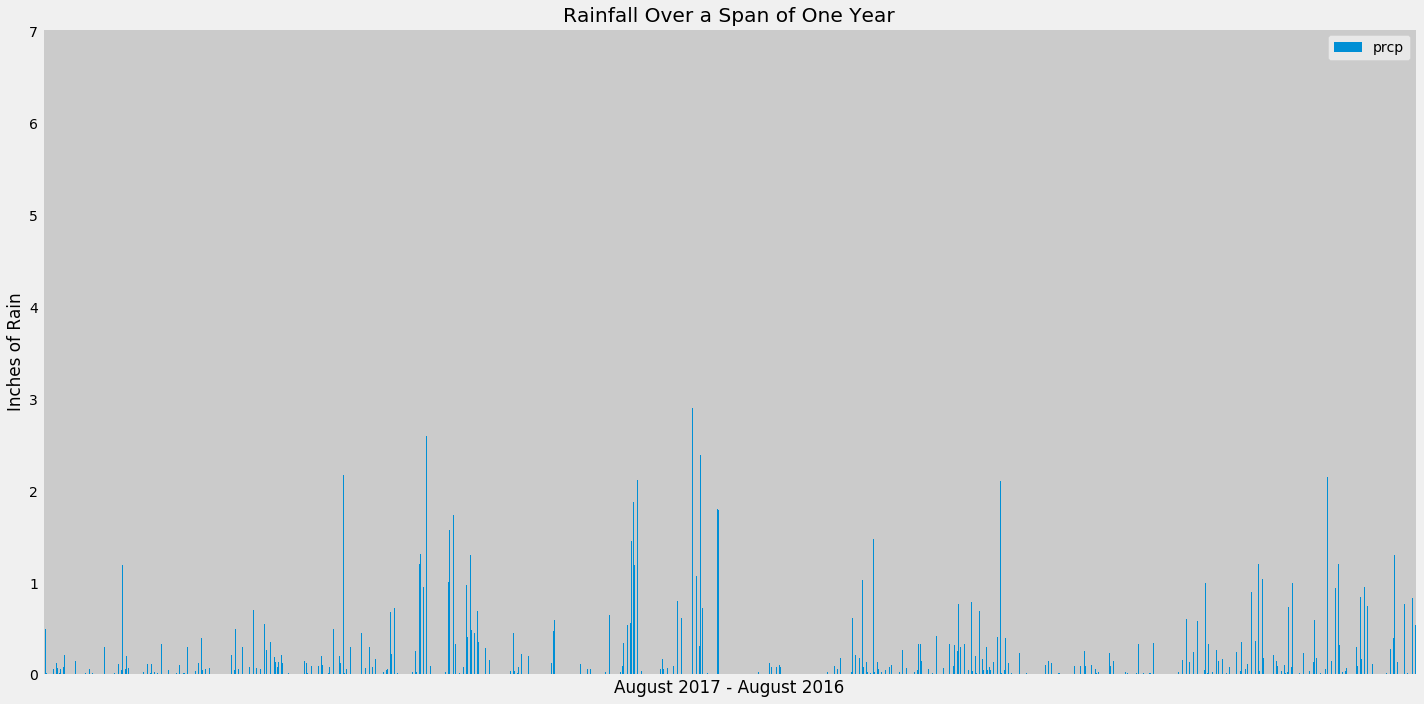

In [237]:
#plot the results in a bar graph
raindata_plot.plot(kind="bar", title="Rainfall Over a Span of One Year", figsize = (20, 10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel("August 2017 - August 2016")
plt.ylabel("Inches of Rain")
plt.tight_layout()
plt.show()


![precipitation](Images/precipitation.png)

In [238]:
# Use Pandas to calculate the summary statistics for the precipitation data
raindata_plot.describe()

,prcp
count,2148.000000
mean,0.182896
std,0.467339
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
